In [3]:
# === Libraries ===
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# === Load & Filter ===
df = pd.read_csv(r"D:\downloads\extended_crime_dataset_india.csv", encoding="utf-8-sig")
df = df[df['Crime Description'].str.upper().isin(['DOMESTIC VIOLENCE','SEXUAL ASSAULT'])].copy()

# Clean
df['Victim Age'] = pd.to_numeric(df['Victim Age'], errors='coerce').fillna(df['Victim Age'].median())
df['Victim Gender'] = df['Victim Gender'].str.upper().map({'M':'Male','F':'Female'})
df['Crime_Label'] = df['Crime Description'].str.upper().map({'DOMESTIC VIOLENCE':0,'SEXUAL ASSAULT':1})
df['Case_Closed_Label'] = df['Case Closed'].str.upper().map({'YES':1,'NO':0})

# ---------------------------
# Objective 1: Age & Gender (H1)
# ---------------------------
print("\n--- H1: Demographic Vulnerability ---")
gender_table = pd.crosstab(df['Victim Gender'], df['Crime Description'])
chi2, p, *_ = chi2_contingency(gender_table)
print("Chi-square (Gender vs Crime Type) p-value:", p)

tstat, tp = ttest_ind(
    df[df['Crime_Label']==0]['Victim Age'],
    df[df['Crime_Label']==1]['Victim Age'],
    equal_var=False
)
print("t-test (Age diff) p-value:", tp)

# 🔹 Visualization
sns.countplot(data=df, x='Victim Gender', hue='Crime Description', palette='Set2')
plt.title("Crime Distribution by Gender")
plt.show()

sns.histplot(data=df, x='Victim Age', hue='Crime Description', kde=True, bins=20, palette='Set1')
plt.title("Victim Age Distribution by Crime Type")
plt.show()

# ---------------------------
# Objective 2: Victim Experience (H2)
# ---------------------------
print("\n--- H2: Case Closure Patterns ---")
closure_table = pd.crosstab(df['Case_Closed_Label'], df['Crime_Label'])
chi2, p, *_ = chi2_contingency(closure_table)
print("Chi-square (Closure vs Crime Type) p-value:", p)

# 🔹 Visualization
sns.countplot(data=df, x='Case Closed', hue='Crime Description', palette='coolwarm')
plt.title("Case Closure by Crime Type")
plt.show()

# ---------------------------
# Objective 3: Location (H3)
# ---------------------------
print("\n--- H3: Geographical Hotspots ---")
print("Top cities:\n", df['City'].value_counts().head(5))

# 🔹 Visualization
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Reported Cases")
plt.xlabel("Number of Cases")
plt.ylabel("City")
plt.show()

# ---------------------------
# Objective 4: Comparative Modeling (H4)
# ---------------------------
print("\n--- H4: Comparative Analysis via Models ---")
X = df[['Victim Age','Victim Gender','City']]
y = df['Crime_Label']

# Encode categorical
preproc = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), ['Victim Age']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Victim Gender','City'])
])

# Logistic Regression
log_reg = Pipeline([('pre',preproc),('clf',LogisticRegression(max_iter=500))])
log_reg.fit(X,y)
print("Logistic Regression Accuracy:", accuracy_score(y, log_reg.predict(X)))

# Random Forest
rf = Pipeline([('pre',preproc),('clf',RandomForestClassifier(n_estimators=100,random_state=42))])
rf.fit(X,y)
print("Random Forest Accuracy:", accuracy_score(y, rf.predict(X)))



--- H1: Demographic Vulnerability ---


ValueError: No data; `observed` has size 0.

Dataset after cleaning: (15394, 19)

--- Objective 1: Demographic Vulnerability ---
Gender-Crime Crosstab:
 Crime Description  DOMESTIC VIOLENCE  SEXUAL ASSAULT
Victim Gender                                       
Female                          4338            4313
Male                            2545            2442
Chi-square (Gender vs Crime Type) p-value: 0.32640679145042023
t-test (Age diff) p-value: 0.649035576847637


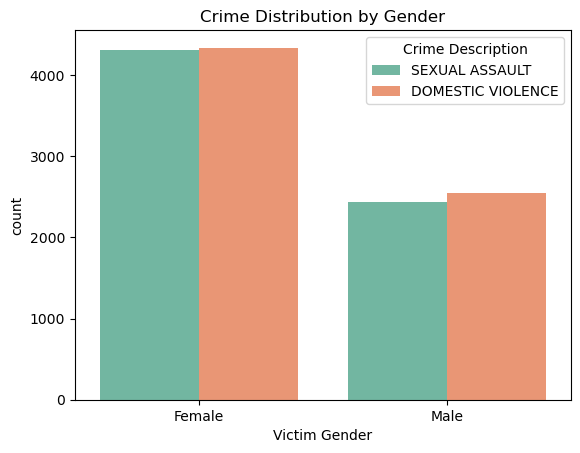

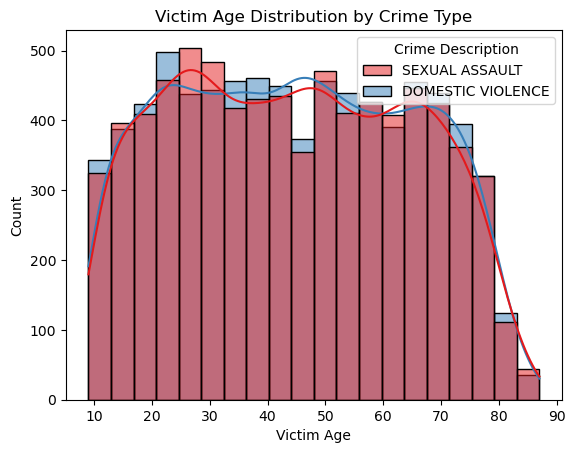


--- Objective 2: Case Closure Patterns ---
Case Closure Crosstab:
 Crime_Label           0     1
Case_Closed_Label            
0                  3759  3908
1                  3996  3731
Chi-square (Closure vs Crime Type) p-value: 0.0009095285672234926


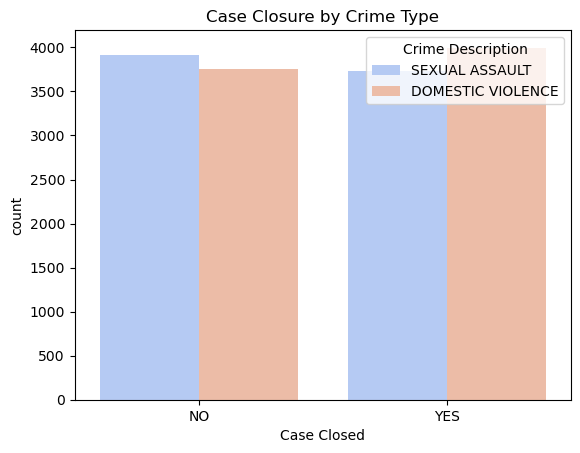


--- Objective 3: Geographical Hotspots ---
Top Cities:
 City
Delhi        2091
Mumbai       1802
Bangalore    1298
Hyderabad    1127
Kolkata      1008
Chennai       904
Pune          835
Ahmedabad     796
Jaipur        565
Lucknow       533
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_17180\418067778.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


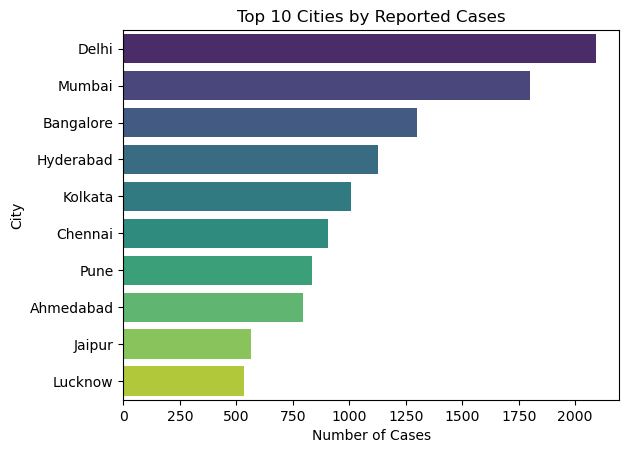


--- Objective 4: Comparative Modeling ---
Logistic Regression Accuracy: 0.5296219306223204
Random Forest Accuracy: 0.7410679485513837


In [4]:
# === Libraries ===
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# === Load & Clean ===
df = pd.read_csv(r"D:\downloads\extended_crime_dataset_india.csv", encoding="utf-8-sig")

# Standardize text
df['Crime Description'] = df['Crime Description'].astype(str).str.strip().str.upper()
df['Victim Gender'] = df['Victim Gender'].astype(str).str.strip().str.upper()
df['Case Closed'] = df['Case Closed'].astype(str).str.strip().str.upper()

# Keep only 2 crimes
df = df[df['Crime Description'].isin(['DOMESTIC VIOLENCE','SEXUAL ASSAULT'])].copy()

# Map values
df['Victim Age'] = pd.to_numeric(df['Victim Age'], errors='coerce').fillna(df['Victim Age'].median())
df['Victim Gender'] = df['Victim Gender'].map({'M':'Male','F':'Female','MALE':'Male','FEMALE':'Female'})
df['Crime_Label'] = df['Crime Description'].map({'DOMESTIC VIOLENCE':0,'SEXUAL ASSAULT':1})
df['Case_Closed_Label'] = df['Case Closed'].map({'YES':1,'NO':0})

print("Dataset after cleaning:", df.shape)

# ---------------------------
# Objective 1: Age & Gender
# ---------------------------
print("\n--- Objective 1: Demographic Vulnerability ---")
gender_table = pd.crosstab(df['Victim Gender'], df['Crime Description'])
print("Gender-Crime Crosstab:\n", gender_table)

if gender_table.size > 0:
    chi2, p, *_ = chi2_contingency(gender_table)
    print("Chi-square (Gender vs Crime Type) p-value:", p)

tstat, tp = ttest_ind(
    df[df['Crime_Label']==0]['Victim Age'],
    df[df['Crime_Label']==1]['Victim Age'],
    equal_var=False
)
print("t-test (Age diff) p-value:", tp)

sns.countplot(data=df, x='Victim Gender', hue='Crime Description', palette='Set2')
plt.title("Crime Distribution by Gender")
plt.show()

sns.histplot(data=df, x='Victim Age', hue='Crime Description', kde=True, bins=20, palette='Set1')
plt.title("Victim Age Distribution by Crime Type")
plt.show()

# ---------------------------
# Objective 2: Victim Experience
# ---------------------------
print("\n--- Objective 2: Case Closure Patterns ---")
closure_table = pd.crosstab(df['Case_Closed_Label'], df['Crime_Label'])
print("Case Closure Crosstab:\n", closure_table)

if closure_table.size > 0:
    chi2, p, *_ = chi2_contingency(closure_table)
    print("Chi-square (Closure vs Crime Type) p-value:", p)

sns.countplot(data=df, x='Case Closed', hue='Crime Description', palette='coolwarm')
plt.title("Case Closure by Crime Type")
plt.show()

# ---------------------------
# Objective 3: Location
# ---------------------------
print("\n--- Objective 3: Geographical Hotspots ---")
top_cities = df['City'].value_counts().head(10)
print("Top Cities:\n", top_cities)

sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Reported Cases")
plt.xlabel("Number of Cases")
plt.ylabel("City")
plt.show()

# ---------------------------
# Objective 4: Comparative Modeling
# ---------------------------
print("\n--- Objective 4: Comparative Modeling ---")
X = df[['Victim Age','Victim Gender','City']]
y = df['Crime_Label']

# Preprocessing pipeline
preproc = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), ['Victim Age']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Victim Gender','City'])
])

# Logistic Regression
log_reg = Pipeline([('pre',preproc),('clf',LogisticRegression(max_iter=500))])
log_reg.fit(X,y)
print("Logistic Regression Accuracy:", accuracy_score(y, log_reg.predict(X)))

# Random Forest
rf = Pipeline([('pre',preproc),('clf',RandomForestClassifier(n_estimators=100,random_state=42))])
rf.fit(X,y)
print("Random Forest Accuracy:", accuracy_score(y, rf.predict(X)))
